In [1]:
# 5.3

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

In [2]:
# Prior

mu0 = 1.9
k0 = 1
s20 = 0.010
nu0 = 1

In [3]:
# Data

y = np.array([1.64, 1.70, 1.72, 1.74, 1.82, 1.82, 1.82, 1.9, 2.08])
n = len(y)
ybar = np.mean(y)
s2 = np.var(y, ddof=1)

In [4]:
# Posterior Inference

kn = k0 + n
nun = nu0 + n
mun = (k0 * mu0  + n * ybar) / kn
s2n = (nu0 * s20 + (n - 1) * s2 + (k0 * n * (ybar - mu0) ** 2) / kn )  / nun

print(mun)
print(s2n)
print(np.sqrt(s2n))

1.814
0.015324
0.12379014500355026


In [5]:
thetas = np.linspace(1.6, 2.0)
s2ls = np.linspace(15, 160)
Y, X = np.meshgrid(s2ls, thetas)

density = []
for theta in thetas:
    for s2l in s2ls:
        theta_post = norm.pdf(theta, mun, 1/(np.sqrt(10 * s2l)))      
        s2_post = gamma.pdf(s2l, a=nun/2, scale=2/(10*s2n))
        density.append(theta_post * s2_post)

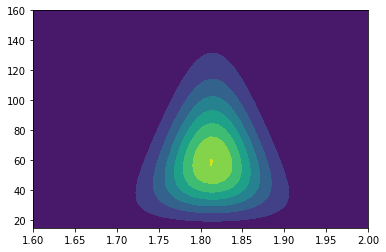

In [6]:
density = np.array(density).reshape(50, 50)

cp = plt.contourf(X, Y, density)

In [7]:
thetas = np.linspace(1.6, 2.0)
s2s = np.linspace(0.005, 0.06)
Y, X = np.meshgrid(s2s, thetas)

density = []
for theta in thetas:
    for s2l in s2s:
        theta_post = norm.pdf(theta, mun, 1/(np.sqrt(10 / s2l)))      
        s2_post = gamma.pdf(1/s2l, a=nun/2, scale=2/(10*s2n))
        density.append(theta_post * s2_post)

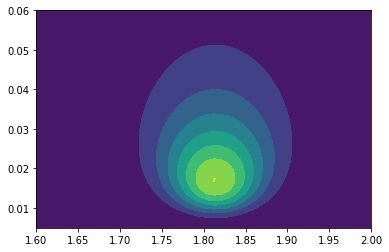

In [8]:
density = np.array(density).reshape(50, 50)

cp = plt.contourf(X, Y, density)